In [9]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)
import torch.nn as nn

In [3]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [6]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([1, 9, 6, 0, 8, 4, 7, 5, 3]), tensor([ 2, 10]))

In [7]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [10]:
linear_model = nn.Linear(1, 1) #
linear_model(t_un_val)

tensor([[6.0503],
        [6.9836]], grad_fn=<AddmmBackward0>)

In [11]:
linear_model.weight

Parameter containing:
tensor([[0.9149]], requires_grad=True)

In [12]:
linear_model.bias

Parameter containing:
tensor([0.7254], requires_grad=True)

In [14]:
x = torch.ones(1)
linear_model(x)

tensor([1.6403], grad_fn=<ViewBackward0>)

Группировка входных данных в батчи

In [15]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[1.6403],
        [1.6403],
        [1.6403],
        [1.6403],
        [1.6403],
        [1.6403],
        [1.6403],
        [1.6403],
        [1.6403],
        [1.6403]], grad_fn=<AddmmBackward0>)

In [17]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)
t_u.shape

torch.Size([11, 1])

In [18]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(),
                      lr=1e-2)


In [20]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.9927]], requires_grad=True),
 Parameter containing:
 tensor([0.0440], requires_grad=True)]

In [27]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
  for epoch in range(1, n_epochs + 1):
    t_p_train = model(t_u_train)
    loss_train = loss_fn(t_p_train, t_c_train)

    t_p_val = model(t_u_val)
    loss_val = loss_fn(t_p_val, t_c_val)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    if epoch == 1 or epoch % 1000 == 0:
        print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
        f" Validation loss {loss_val.item():.4f}")

In [28]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 182.9080, Validation loss 388.0358
Epoch 1000, Training loss 3.5830, Validation loss 5.2924
Epoch 2000, Training loss 3.0236, Validation loss 3.7671
Epoch 3000, Training loss 3.0125, Validation loss 3.5753

Parameter containing:
tensor([[5.1964]], requires_grad=True)
Parameter containing:
tensor([-16.7516], requires_grad=True)


In [29]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [30]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [32]:
for name, param in seq_model.named_parameters():
  print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [35]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [36]:
for name, param in seq_model.named_parameters():
  print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [37]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.2595], requires_grad=True)

In [38]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
 n_epochs = 5000,
 optimizer = optimizer,
 model = seq_model,
 loss_fn = nn.MSELoss(),
 t_u_train = t_un_train,
 t_u_val = t_un_val,
 t_c_train = t_c_train,
 t_c_val = t_c_val)
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 144.9446, Validation loss 312.1332
Epoch 1000, Training loss 7.1242, Validation loss 5.8363
Epoch 2000, Training loss 3.6955, Validation loss 7.5239
Epoch 3000, Training loss 2.0847, Validation loss 1.9484
Epoch 4000, Training loss 1.8825, Validation loss 2.2926
Epoch 5000, Training loss 1.8161, Validation loss 2.5513
output tensor([[12.9526],
        [20.0455]], grad_fn=<AddmmBackward0>)
answer tensor([[15.],
        [21.]])
hidden tensor([[ 0.0036],
        [-0.0014],
        [ 0.0073],
        [ 0.0053],
        [-0.0222],
        [ 0.0359],
        [ 0.0067],
        [ 0.0075]])


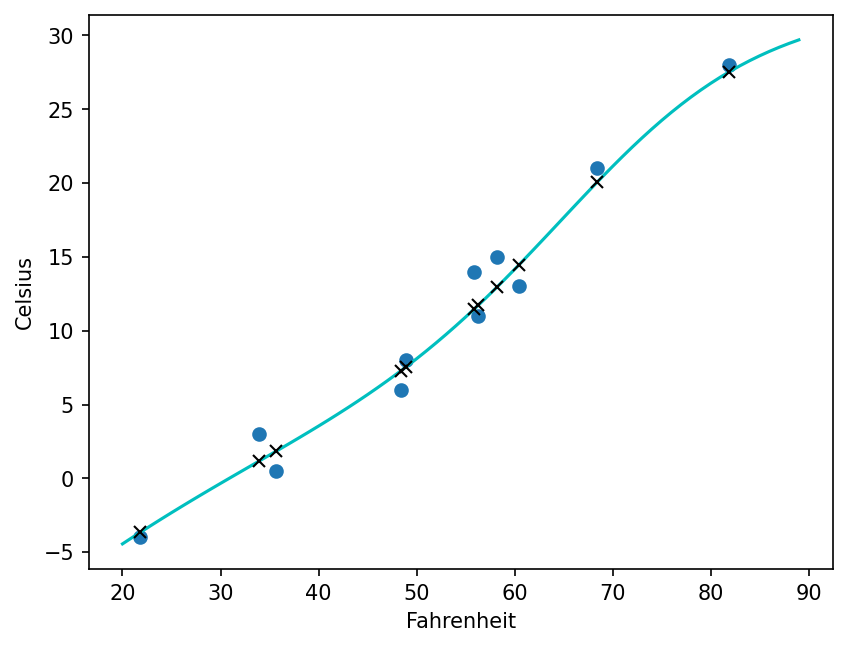

In [46]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')